# <img style="float: left; padding-right: 10px; width: 200px" src="https://raw.githubusercontent.com/trivikverma/researchgroup/master/assets/media/logo.png"> Hackathon 2024

**Team 13**<br>
**Mannan Gupta | Haknas Sadak | Nils Hollestelle | Edwin smits | Renee Lam**<br>

---



## Step 1: Loading libraries
### lorem impsum
    
lorem impsum

In [279]:
# your code here 
import seaborn as sns
import pandas as pd
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import geopandas as gpd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS

## 2. Loading data

### a. Parking

In [280]:
df_parking = pd.read_excel('data/Traffic.xlsx','data',index_col = 'Area code')

df_parking.head()

,Geography,Area,Year,theme,Nuisance: speeding traffic (%),Nuisance: aggressive behaviour in traffic (%),Nuisance: parking problems (%),Parking spots total,Parking spots fiscal,Parking spots non public,Parking facilities (1-10),Parking facilities bikes (1-10),Nuisance: parking (1-10),Public transport (1-10),Public transport 65+ (1-10),Nuisance: amount of traffic (1-10),Nuisance: traffic noise (1-10),Parking spots non-fiscal
Area code,,,,,,,,,,,,,,,,,,
AA,Wijken,Haarlemmerbuurt,2021,Traffic,15,10,10,1112,952,160,5.9,5.7,6.9,7.6,7.3,6.8,6.8,-
AB,Wijken,Jordaan,2021,Traffic,17,16,21,2711,2409,302,5.5,5.1,6.5,7.7,7.5,6.6,6.8,-
AC,Wijken,Grachtengordel-West,2021,Traffic,20,16,21,1338,1218,120,5.4,5.4,6.2,7.9,7.7,6.8,6.8,-
AD,Wijken,Burgwallen-Nieuwe Zijde,2021,Traffic,18,12,16,619,382,237,5.5,5.6,7,8.5,7.9,6.4,6.2,-
AE,Wijken,Burgwallen-Oude Zijde,2021,Traffic,13,21,22,310,211,99,5.2,5.9,6.6,8.5,8.6,6.7,6.9,-


### b. Housing

In [281]:
df_housing = pd.read_excel('data/Housing.xlsx','data',index_col = 'Area code')

df_housing.head()

,Geography,Area,Year,theme,Housing stock,Housing density,Trailer space,Mooring place,Sheltered accommodations,Property: Housing corporation,...,Wish to move 65+ (%),Neighbourhood: Satisfaction with neighbourhood (1-10),Neighbourhood: pleasant to live (1-10),Neighbourhood: Expected development (1-10),Neighbourhood: % improved,Neighbourhood: % stayed the same,Neighbourhood: % deteriorated,Neighbourhood: feeling at home (1-10),Involvement neighbours (1-10),Rent: average in commercial sector
Area code,,,,,,,,,,,,,,,,,,,,,
AA,Wijken,Haarlemmerbuurt,2021,Housing,5654,10558,4,135,38,2341,...,16,8.2,8,7.2,14,65,16,8.3,6.7,-
AB,Wijken,Jordaan,2021,Housing,13217,15870,1,113,6,4832,...,14,8.2,7.8,7,15,62,18,8.3,6.8,1414
AC,Wijken,Grachtengordel-West,2021,Housing,4316,9638,1,75,9,462,...,13,8.4,8,7,13,64,19,8.4,6.6,-
AD,Wijken,Burgwallen-Nieuwe Zijde,2021,Housing,2972,5302,1,13,5,289,...,-,7.2,7.5,6.6,26,47,18,7.7,5.7,1434
AE,Wijken,Burgwallen-Oude Zijde,2021,Housing,2974,8535,-,3,12,572,...,-,7.3,7.1,6.6,32,40,22,7.8,6.5,-


### c. Population

In [282]:
df_population = pd.read_excel('data/Population.xlsx','data',index_col = 'Area code')
df_population.head()


,Geography,Area,Year,theme,Population,Gender: male,Gender: female,Gender: % male,Gender: % female,Population density,...,Main resident 18-66,Population: births,Population: deaths,Population: arrivals from outside the city,Population: departures from the city,Population: arrivals from Amsterdam (other area),Population: departures to Amsterdam (other area),Population: migration within area,Duration of residence,Migration background: Unknown
Area code,,,,,,,,,,,,,,,,,,,,,
AA,Wijken,Haarlemmerbuurt,2021,Population,9171,4619,4552,50.4,49.6,17126,...,4491,79,67,726,711,1028,1062,136,9.6,-
AB,Wijken,Jordaan,2021,Population,19403,9836,9567,50.7,49.3,23298,...,10467,172,142,1652,1466,2590,2684,446,9.7,-
AC,Wijken,Grachtengordel-West,2021,Population,6366,3331,3035,52.3,47.7,14217,...,3239,57,28,978,665,932,1105,144,7.9,-
AD,Wijken,Burgwallen-Nieuwe Zijde,2021,Population,4026,2228,1798,55.3,44.7,7182,...,2523,30,9,834,538,838,917,98,5.5,-
AE,Wijken,Burgwallen-Oude Zijde,2021,Population,4525,2486,2039,54.9,45.1,12986,...,2774,33,21,697,537,743,879,120,6,-


### d. Income

In [283]:
df_income = pd.read_excel('data/Income.xlsx','data',index_col = 'Area code')
df_income.head()

,Geography,Area,Year,theme,Mean disposable household income,Income 1st quintile,Income 2nd quintile,Income 3rd quintile,Income 4th quintile,Income 5th quintile,...,Househoulds children social welfare benefits,% Househoulds children social welfare benefits,Disability benefits,Disability benefits (%),Unemployment benefits,Unemployment benefits (%),% economically independent men,% economically indepdent women,Social welfare,Social welfare (%)
Area code,,,,,,,,,,,,,,,,,,,,,
AA,Wijken,Haarlemmerbuurt,2021,Income,49800,30,20,17,13,21,...,50,7.4,330,4.9,200,3,68,62,-,-
AB,Wijken,Jordaan,2021,Income,46700,33,20,17,13,17,...,55,4.7,690,4.7,510,3.4,67,63,-,-
AC,Wijken,Grachtengordel-West,2021,Income,83300,20,16,15,16,33,...,-,-,80,1.6,90,1.8,70,61,-,-
AD,Wijken,Burgwallen-Nieuwe Zijde,2021,Income,44300,32,21,19,13,15,...,-,-,60,1.7,130,3.7,69,63,-,-
AE,Wijken,Burgwallen-Oude Zijde,2021,Income,40800,35,22,16,13,13,...,15,8.6,70,1.8,130,3.3,66,54,-,-


### d. Geometry

In [284]:
df_map = gpd.read_file('data/wijks.csv',GEOM_POSSIBLE_NAMES="geometry", 
                    KEEP_GEOM_COLUMNS="NO")


In [285]:
df_map['Area code'] = df_map['Wijkcode'].str[1:3]
df_map = df_map.set_index('Area code')



#df_map.plot()

<Axes: >

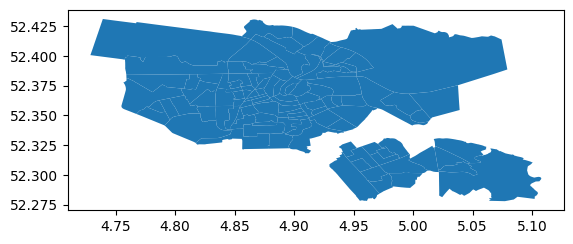

In [286]:
df_map.plot()

In [287]:
df_map

,OBJECTNUMMER,CBS_Wijkcode,Wijkcode,Wijk,Gebiedcode,Gebied,Stadsdeelcode,Stadsdeel,Oppervlakte_m2,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,geometry
Area code,,,,,,,,,,,,,,
EQ,1,"""BU0363EQ""","""EQ""","""Da Costabuurt""","""GE05""","""Oud-West, De Baarsjes""","""E""","""West""",257542,"POLYGON((4.867406 52.371797,4.869586 52.368605...","""POLYGON((52.371797 4.867406,52.368605 4.86958...",4.8721075,52.37013,"POLYGON ((4.86741 52.37180, 4.86959 52.36861, ..."
ER,2,"""BU0363ER""","""ER""","""Westindische Buurt""","""GE05""","""Oud-West, De Baarsjes""","""E""","""West""",345503,"POLYGON((4.848885 52.358045,4.848892 52.357914...","""POLYGON((52.358045 4.848885,52.357914 4.84889...",4.854062,52.361007,"POLYGON ((4.84889 52.35804, 4.84889 52.35791, ..."
KB,3,"""BU0363KB""","""KB""","""Schinkelbuurt""","""GK11""","""Oud-Zuid""","""K""","""Zuid""",344932,"POLYGON((4.848181 52.342768,4.849791 52.342924...","""POLYGON((52.342768 4.848181,52.342924 4.84979...",4.852877,52.3496455,"POLYGON ((4.84818 52.34277, 4.84979 52.34292, ..."
KC,4,"""BU0363KC""","""KC""","""Willemspark""","""GK11""","""Oud-Zuid""","""K""","""Zuid""",695818,"POLYGON((4.855085 52.35641,4.855027 52.356322,...","""POLYGON((52.35641 4.855085,52.356322 4.855027...",4.8627965,52.354371,"POLYGON ((4.85508 52.35641, 4.85503 52.35632, ..."
KD,5,"""BU0363KD""","""KD""","""Museumkwartier""","""GK11""","""Oud-Zuid""","""K""","""Zuid""",1380178,"POLYGON((4.86554 52.358854,4.867135 52.356104,...","""POLYGON((52.358854 4.86554,52.356104 4.867135...",4.8764645,52.355265,"POLYGON ((4.86554 52.35885, 4.86714 52.35610, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EL,107,"""BU0363EL""","""EL""","""Geuzenbuurt""","""GE05""","""Oud-West, De Baarsjes""","""E""","""West""",290653,"POLYGON((4.855569 52.374358,4.856556 52.371126...","""POLYGON((52.374358 4.855569,52.371126 4.85655...",4.861403,52.3727755,"POLYGON ((4.85557 52.37436, 4.85656 52.37113, ..."
EM,108,"""BU0363EM""","""EM""","""Hoofdweg e.o.""","""GE05""","""Oud-West, De Baarsjes""","""E""","""West""",418118,"POLYGON((4.848359 52.369716,4.848708 52.368959...","""POLYGON((52.369716 4.848359,52.368959 4.84870...",4.8533065,52.3672465,"POLYGON ((4.84836 52.36972, 4.84871 52.36896, ..."
EN,109,"""BU0363EN""","""EN""","""Chassébuurt""","""GE05""","""Oud-West, De Baarsjes""","""E""","""West""",274609,"POLYGON((4.856556 52.371126,4.857367 52.368465...","""POLYGON((52.371126 4.856556,52.368465 4.85736...",4.860792,52.367594,"POLYGON ((4.85656 52.37113, 4.85737 52.36847, ..."


## Step 3: Merging data
### lorem impsum
    
lorem impsum

In [288]:
df = df_parking[['Parking spots total','Parking spots non public','Parking spots fiscal']]
df1 = df_housing[['Rent: average', 'Average number of residents']]
df2 = df_population[['Households: % single-parent family', 'Households: % single-person', 'Households: % couple without children', 'Households: % couple with children', 'Households: % other']]
df3 = df_income[['Mean disposable household income']]

df = df.join([df1,df2,df3,df_map])

df = df.dropna()



In [289]:

df['Oppervlakte_m2'] = df['Oppervlakte_m2'].astype(float)

df['Rent: average'] = df['Rent: average'].replace('-', 'NaN')
df['Rent: average'] = df['Rent: average'].astype(float)

df['Parking spots fiscal'] = df['Parking spots fiscal'].replace('-', 'NaN')
df['Parking spots fiscal'] = df['Parking spots fiscal'].astype(float)

df['Mean disposable household income'] = df['Mean disposable household income'].replace('-', 'NaN')
df['Mean disposable household income'] = df['Mean disposable household income'].astype(float)

df['Parking density'] = df['Parking spots total']/df['Oppervlakte_m2'] * 100000
df['Parking non public density'] = df['Parking spots non public']/df['Oppervlakte_m2'] * 100000
df['Parking fiscal density'] = df['Parking spots fiscal']/df['Oppervlakte_m2'] * 100000

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, AA to TA
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Parking spots total                    103 non-null    float64 
 1   Parking spots non public               103 non-null    float64 
 2   Parking spots fiscal                   90 non-null     float64 
 3   Rent: average                          69 non-null     float64 
 4   Average number of residents            103 non-null    float64 
 5   Households: % single-parent family     103 non-null    object  
 6   Households: % single-person            103 non-null    float64 
 7   Households: % couple without children  103 non-null    float64 
 8   Households: % couple with children     103 non-null    float64 
 9   Households: % other                    103 non-null    object  
 10  Mean disposable household income       102 non-null    float64 
 11

In [290]:
df_matrix = df[['Rent: average', 'Average number of residents', 'Households: % single-person', 'Households: % couple without children', 'Households: % couple with children', 'Parking fiscal density', 'Parking non public density', 'Parking density', 'Mean disposable household income']]
df_matrix

,Rent: average,Average number of residents,Households: % single-person,Households: % couple without children,Households: % couple with children,Parking fiscal density,Parking non public density,Parking density,Mean disposable household income
Area code,,,,,,,,,
AA,834.0,1.62,59.8,22.8,10.4,117.323159,19.718178,137.041337,49800.0
AB,815.0,1.47,65.6,20.9,7.8,255.474027,32.027047,287.501074,46700.0
AC,1202.0,1.47,59.3,26.6,9.0,214.856119,21.168091,236.024209,83300.0
AD,1074.0,1.35,64.3,27.3,4.0,52.640572,32.659203,85.299776,44300.0
AE,832.0,1.52,65.5,24.8,4.2,52.336282,24.555886,76.892167,40800.0
...,...,...,...,...,...,...,...,...,...
MK,NaN,7.89,21.7,13.0,60.9,2.631682,0.037066,2.668748,NaN
NF,NaN,2.65,24.0,29.2,40.0,88.726417,2.084955,147.336818,83500.0
NM,NaN,2.08,42.6,21.4,19.2,421.150332,31.325231,452.475563,37200.0


## Step 4: Plotting

### a. Regressions

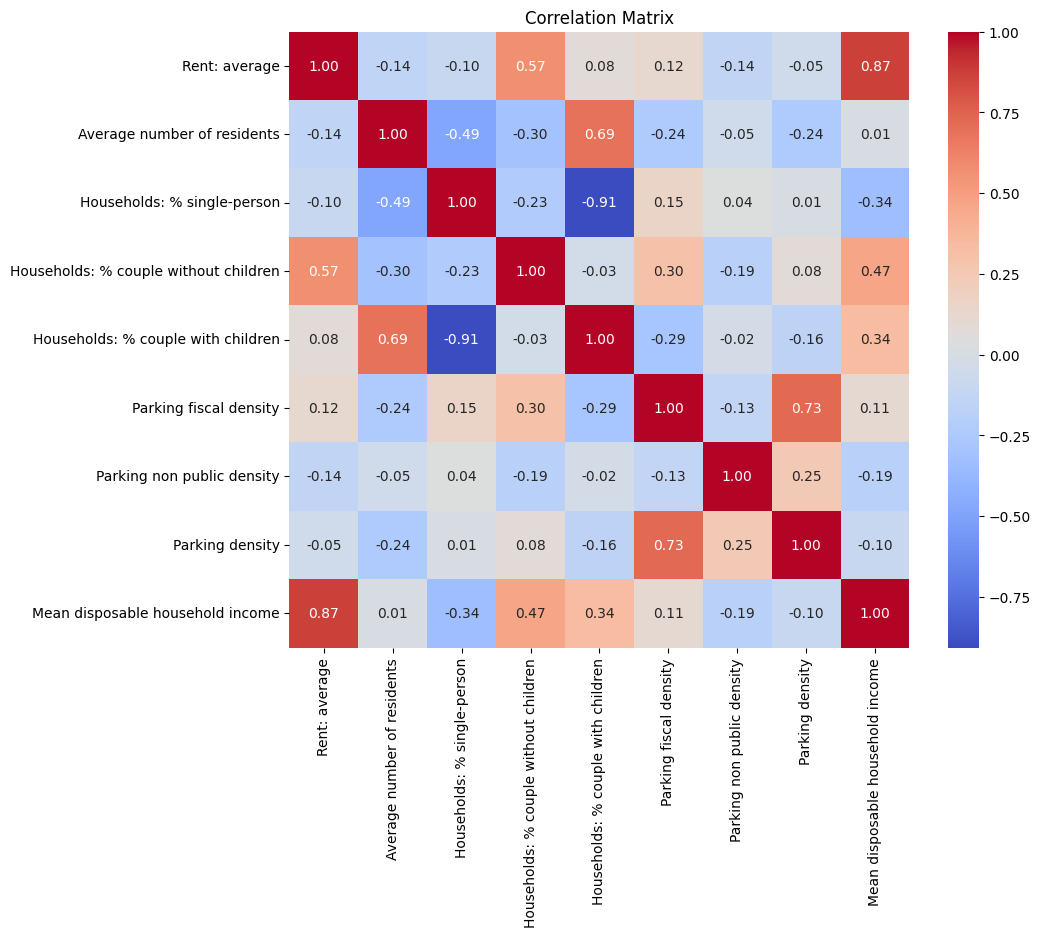

In [291]:

df_correlation = df_matrix.apply(pd.to_numeric, errors='coerce')

correlation_matrix = df_correlation.corr()

Fig = plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Fig.savefig('correlation_matrix.png', dpi = 300, bbox_inches = 'tight')

In [292]:
df_matrix_1 = df[['Rent: average', 'Average number of residents', 'Households: % single-person', 'Households: % couple without children', 'Households: % couple with children', 'Parking spots fiscal', 'Parking spots non public', 'Parking spots total', 'Mean disposable household income']]
df_matrix_1

,Rent: average,Average number of residents,Households: % single-person,Households: % couple without children,Households: % couple with children,Parking spots fiscal,Parking spots non public,Parking spots total,Mean disposable household income
Area code,,,,,,,,,
AA,834.0,1.62,59.8,22.8,10.4,952.0,160.0,1112.0,49800.0
AB,815.0,1.47,65.6,20.9,7.8,2409.0,302.0,2711.0,46700.0
AC,1202.0,1.47,59.3,26.6,9.0,1218.0,120.0,1338.0,83300.0
AD,1074.0,1.35,64.3,27.3,4.0,382.0,237.0,619.0,44300.0
AE,832.0,1.52,65.5,24.8,4.2,211.0,99.0,310.0,40800.0
...,...,...,...,...,...,...,...,...,...
MK,NaN,7.89,21.7,13.0,60.9,142.0,2.0,144.0,NaN
NF,NaN,2.65,24.0,29.2,40.0,383.0,9.0,636.0,83500.0
NM,NaN,2.08,42.6,21.4,19.2,726.0,54.0,780.0,37200.0


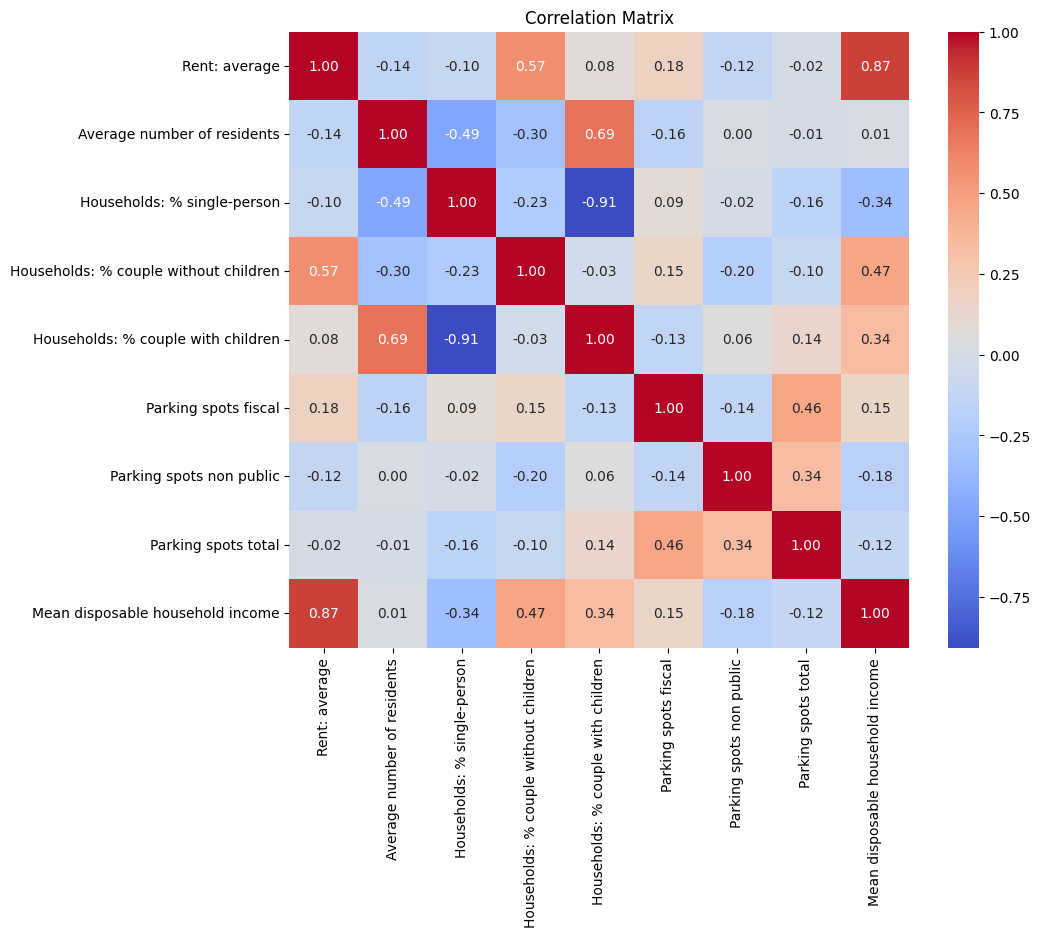

In [293]:

df_correlation_1 = df_matrix_1.apply(pd.to_numeric, errors='coerce')

correlation_matrix_1 = df_correlation_1.corr()

Fig_1 = plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Fig_1.savefig('correlation_matrix.png', dpi = 300, bbox_inches = 'tight')

### b. Plots

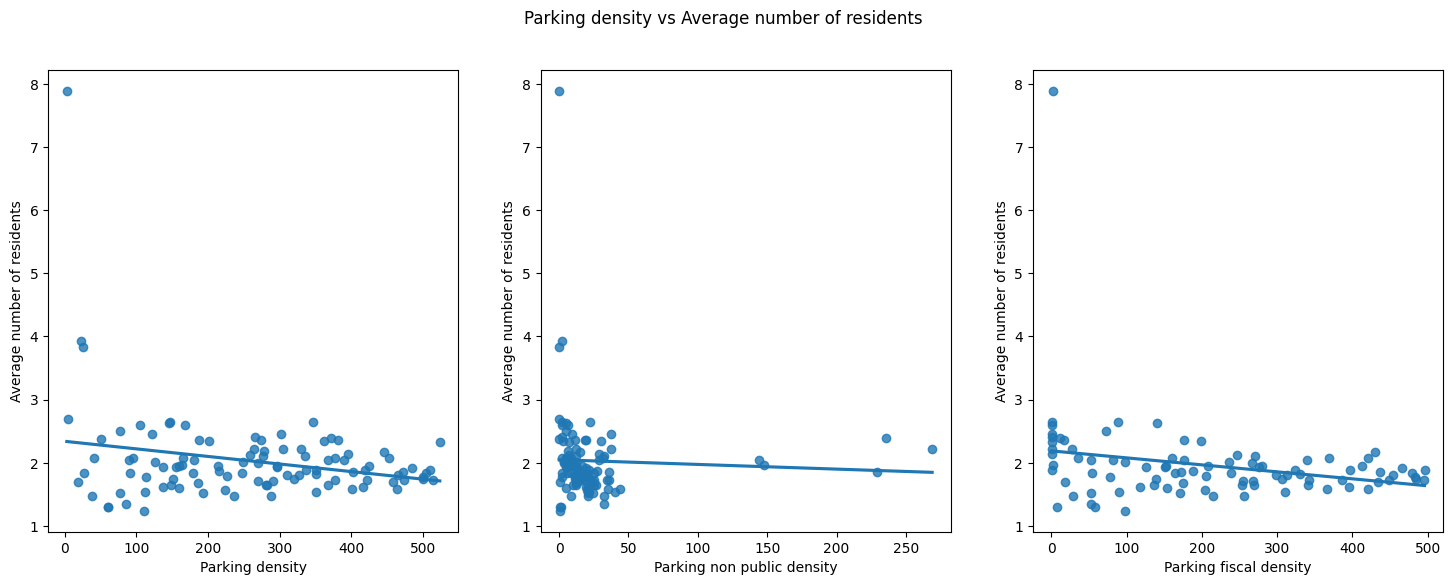

In [294]:
#df.plot(kind='scatter', x='Parking Density total', y='Average number of residents')

# Set up figure and axis
f, ax = plt.subplots(1,3, figsize=(18, 6))

f.suptitle('Parking density vs Average number of residents')

sns.regplot(x='Parking density', y='Average number of residents', data=df, ci=None, ax=ax[0])

sns.regplot(x='Parking non public density', y='Average number of residents', data=df, ci=None, ax=ax[1])

sns.regplot(x='Parking fiscal density', y='Average number of residents', data=df, ci=None, ax=ax[2])


# Draw
plt.show()

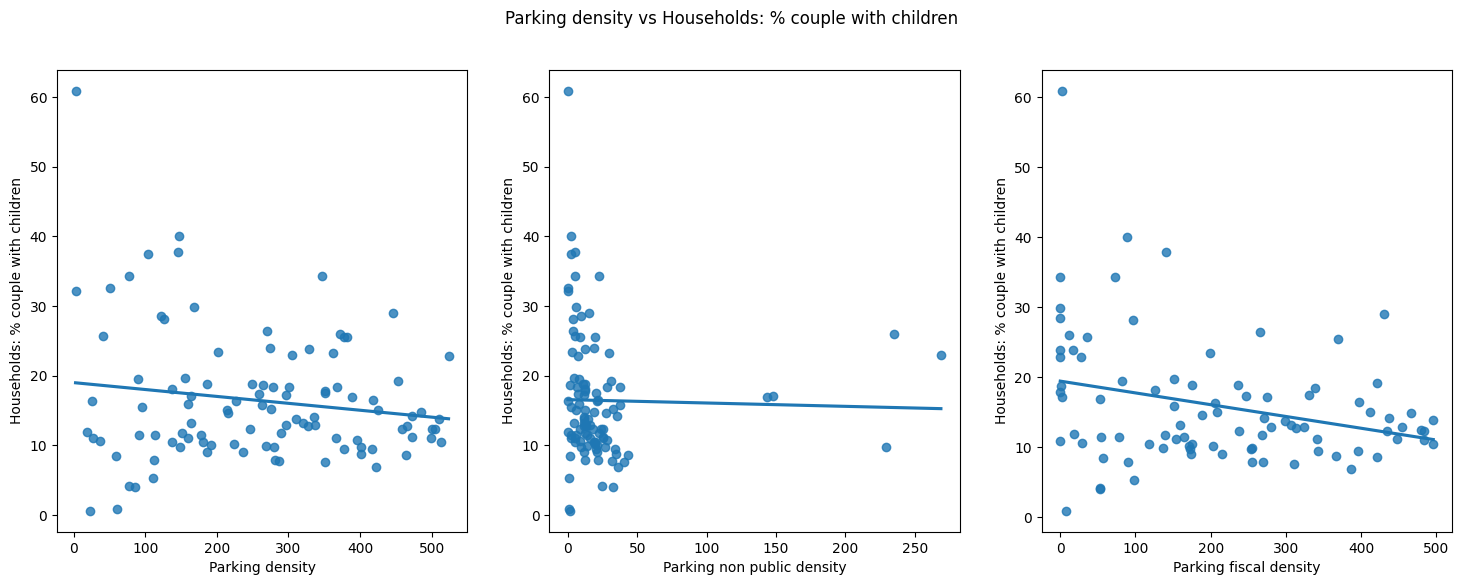

In [295]:
#df.plot(kind='scatter', x='Parking Density total', y='Average number of residents')

# Set up figure and axis
f, ax = plt.subplots(1,3, figsize=(18, 6))

f.suptitle('Parking density vs Households: % couple with children')

sns.regplot(x='Parking density', y='Households: % couple with children', data=df, ci=None, ax=ax[0])

sns.regplot(x='Parking non public density', y='Households: % couple with children', data=df, ci=None, ax=ax[1])

sns.regplot(x='Parking fiscal density', y='Households: % couple with children', data=df, ci=None, ax=ax[2])

# Draw
plt.show()

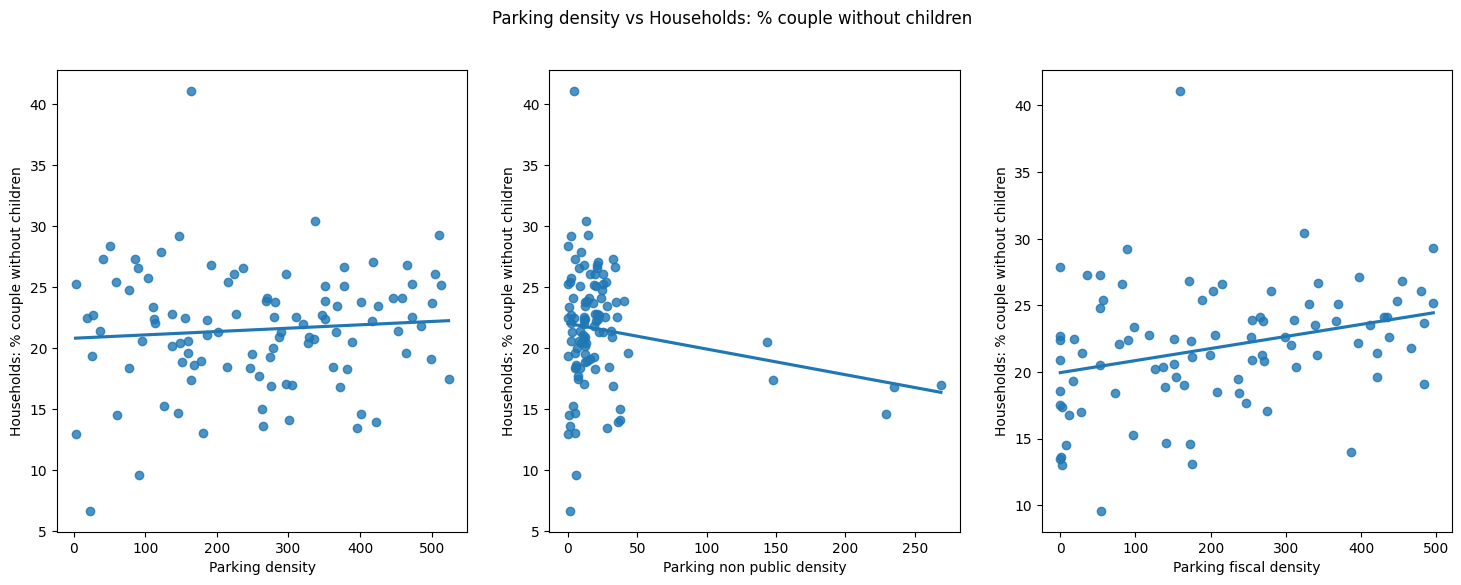

In [296]:
#df.plot(kind='scatter', x='Parking Density total', y='Average number of residents')

# Set up figure and axis
f, ax = plt.subplots(1,3, figsize=(18, 6))

f.suptitle('Parking density vs Households: % couple without children')

sns.regplot(x='Parking density', y='Households: % couple without children', data=df, ci=None, ax=ax[0])

sns.regplot(x='Parking non public density', y='Households: % couple without children', data=df, ci=None, ax=ax[1])

sns.regplot(x='Parking fiscal density', y='Households: % couple without children', data=df, ci=None, ax=ax[2])

# Draw
plt.show()

### c. Maps

In [297]:
df = df_parking[['Parking spots total','Parking spots non public','Parking spots fiscal']]
df1 = df_housing[['Rent: average', 'Average number of residents']]
df2 = df_population[['Households: % single-parent family', 'Households: % single-person', 'Households: % couple without children', 'Households: % couple with children', 'Households: % other']]

df_map_1 = df_map.join([df1,df2,df])

df_map_1.dropna()


,OBJECTNUMMER,CBS_Wijkcode,Wijkcode,Wijk,Gebiedcode,Gebied,Stadsdeelcode,Stadsdeel,Oppervlakte_m2,WKT_LNG_LAT,...,Rent: average,Average number of residents,Households: % single-parent family,Households: % single-person,Households: % couple without children,Households: % couple with children,Households: % other,Parking spots total,Parking spots non public,Parking spots fiscal
Area code,,,,,,,,,,,,,,,,,,,,,
EQ,1,"""BU0363EQ""","""EQ""","""Da Costabuurt""","""GE05""","""Oud-West, De Baarsjes""","""E""","""West""",257542,"POLYGON((4.867406 52.371797,4.869586 52.368605...",...,823,1.73,5.8,56.6,26.7,9.4,1.5,971.0,88.0,883
ER,2,"""BU0363ER""","""ER""","""Westindische Buurt""","""GE05""","""Oud-West, De Baarsjes""","""E""","""West""",345503,"POLYGON((4.848885 52.358045,4.848892 52.357914...",...,861,1.88,6.7,48.7,29.3,13.8,1.4,1763.0,50.0,1713
KB,3,"""BU0363KB""","""KB""","""Schinkelbuurt""","""GK11""","""Oud-Zuid""","""K""","""Zuid""",344932,"POLYGON((4.848181 52.342768,4.849791 52.342924...",...,774,1.64,6.7,60.4,23.8,7.9,1.3,972.0,43.0,929
KC,4,"""BU0363KC""","""KC""","""Willemspark""","""GK11""","""Oud-Zuid""","""K""","""Zuid""",695818,"POLYGON((4.855085 52.35641,4.855027 52.356322,...",...,1349,2.08,7.1,41.2,25.1,25.5,1.1,2624.0,59.0,2565
KD,5,"""BU0363KD""","""KD""","""Museumkwartier""","""GK11""","""Oud-Zuid""","""K""","""Zuid""",1380178,"POLYGON((4.86554 52.358854,4.867135 52.356104,...",...,1051,1.82,5.6,50.7,25.1,17.5,1.2,4839.0,276.0,4563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EK,106,"""BU0363EK""","""EK""","""Van Galenbuurt""","""GE05""","""Oud-West, De Baarsjes""","""E""","""West""",292941,"POLYGON((4.843038 52.372215,4.843028 52.371911...",...,711,1.73,8.5,69.9,14.0,6.9,0.7,1238.0,105.0,1133
EL,107,"""BU0363EL""","""EL""","""Geuzenbuurt""","""GE05""","""Oud-West, De Baarsjes""","""E""","""West""",290653,"POLYGON((4.855569 52.374358,4.856556 52.371126...",...,836,1.83,5.7,54.2,26.1,12.4,1.5,1466.0,74.0,1392
EM,108,"""BU0363EM""","""EM""","""Hoofdweg e.o.""","""GE05""","""Oud-West, De Baarsjes""","""E""","""West""",418118,"POLYGON((4.848359 52.369716,4.848708 52.368959...",...,716,1.78,7.1,55.6,23.7,12.3,1.2,2094.0,75.0,2019


In [298]:
df_map_1['Parking spots total'] = df_map_1['Parking spots total'].replace('', np.nan)
df_map_1['Oppervlakte_m2'] = df_map_1['Oppervlakte_m2'].replace('', np.nan)

df_map_1['Rent: average'] = df_map_1['Rent: average'].replace('-', np.nan)
df_map_1['Rent: average'] = df_map_1['Rent: average'].astype(float)

df_map_1['Parking spots fiscal'] = df_map_1['Parking spots fiscal'].replace('-', np.nan)
df_map_1['Parking spots fiscal'] = df_map_1['Parking spots fiscal'].astype(float)

/var/folders/c3/71m7w1k51m356vg23mpnvxn00000gn/T/ipykernel_66718/4054171490.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_map_1['Rent: average'] = df_map_1['Rent: average'].replace('-', np.nan)
/var/folders/c3/71m7w1k51m356vg23mpnvxn00000gn/T/ipykernel_66718/4054171490.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_map_1['Parking spots fiscal'] = df_map_1['Parking spots fiscal'].replace('-', np.nan)


In [299]:
df_map_1['Parking Density total'] = 1000000*df_map_1['Parking spots total']/df_map_1['Oppervlakte_m2'].astype(float)
df_map_1['Parking Density non public'] = 1000000*df_map_1['Parking spots non public']/df_map_1['Oppervlakte_m2'].astype(float)
df_map_1['Parking Density fiscal'] = 1000000*df_map_1['Parking spots fiscal']/df_map_1['Oppervlakte_m2'].astype(float)

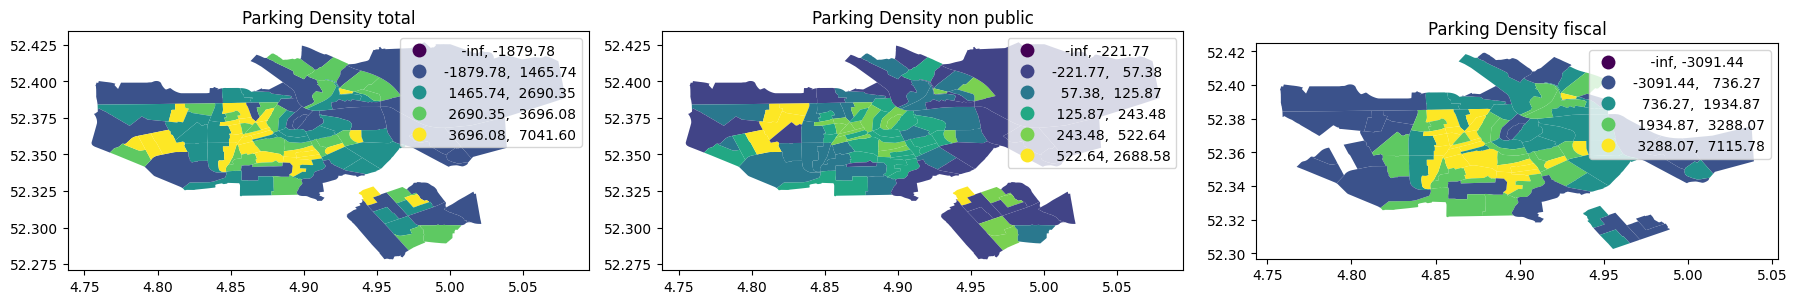

In [300]:
f, ax = plt.subplots(1,3, figsize=(18, 6))

df_map_1['public_private']=df_map_1['Parking Density non public']/df_map_1['Parking Density fiscal']

df_map_1.plot(column='Parking Density total',scheme='BoxPlot' , legend = True, ax = ax[0])
ax[0].set_title('Parking Density total')

df_map_1.plot(column='Parking Density non public',scheme='BoxPlot', legend = True, ax = ax[1])
ax[1].set_title('Parking Density non public')

df_map_1.plot(column='Parking Density fiscal',scheme='BoxPlot', legend = True, ax = ax[2])
ax[2].set_title('Parking Density fiscal')


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Public vs Fiscal parking ratio')

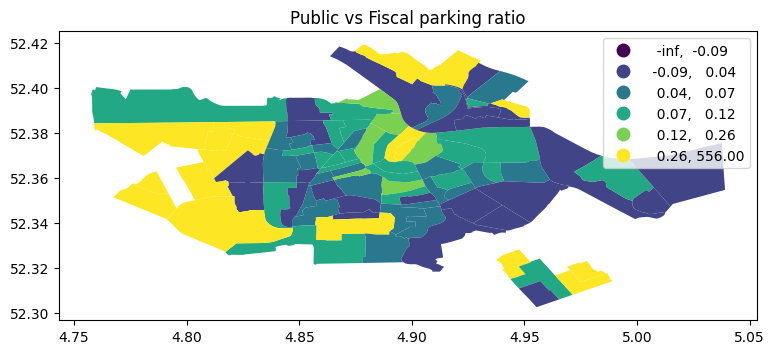

In [302]:
df_map_1['public_private']=df_map_1['Parking Density non public']/df_map_1['Parking Density fiscal']

f, ax = plt.subplots(1,1, figsize=(9, 9))
df_map_1.plot(column='public_private',scheme='BoxPlot' , legend = True, ax = ax)
ax.set_title('Public vs Fiscal parking ratio')

In [307]:
df_map_2=df_map_2.loc[df_map_1['public_private']>0 ,:]



Text(0.5, 1.0, 'Public vs Fiscal parking ratio')

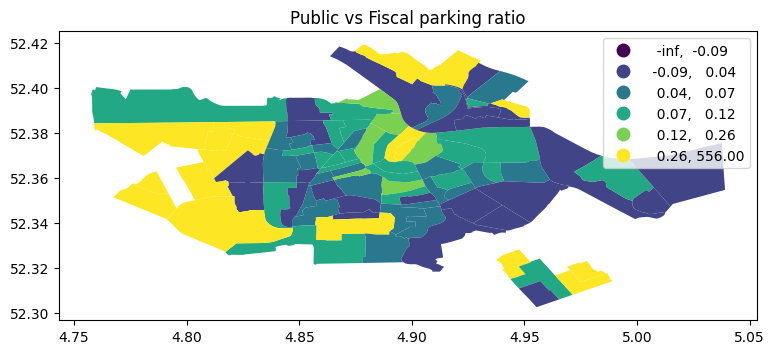

In [308]:
f, ax = plt.subplots(1,1, figsize=(9, 9))
df_map_2.plot(column='public_private',scheme='BoxPlot' , legend = True, ax = ax)
ax.set_title('Public vs Fiscal parking ratio')